In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [6]:
file_path = r"C:\Users\enoki\Documents\annual-pm25-emissions-from-wildfires.csv"

df = pd.read_csv(file_path)

df.head()


,Entity,Code,Year,Annual PM2.5 emissions from wildfires
0,Afghanistan,AFG,2003,2038.63000
1,Afghanistan,AFG,2004,1456.13000
2,Afghanistan,AFG,2005,941.55005
3,Afghanistan,AFG,2006,1482.52000
4,Afghanistan,AFG,2007,1731.14000


In [7]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 5957 non-null   object 
 1   Code                                   5796 non-null   object 
 2   Year                                   5957 non-null   int64  
 3   Annual PM2.5 emissions from wildfires  5957 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.3+ KB


Index(['Entity', 'Code', 'Year', 'Annual PM2.5 emissions from wildfires'], dtype='object')

In [8]:
df = df.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Annual PM2.5 emissions from wildfires': 'pm25'
})


In [9]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')

df = df.dropna(subset=['pm25'])


In [10]:
df['pm25'].describe()


count    5.957000e+03
mean     3.216957e+05
std      1.957970e+06
min      0.000000e+00
25%      1.123000e+01
50%      1.626250e+03
75%      3.676538e+04
max      3.657398e+07
Name: pm25, dtype: float64

In [11]:
avg_pm25 = df.groupby('country')['pm25'].mean().sort_values(ascending=False)
avg_pm25.head(10)


country
World                           2.773864e+07
Africa                          9.415615e+06
South America                   4.539333e+06
Europe                          4.192199e+06
Asia                            4.069642e+06
Russia                          4.036551e+06
North America                   3.830901e+06
Brazil                          2.944779e+06
Canada                          2.295507e+06
Democratic Republic of Congo    2.031913e+06
Name: pm25, dtype: float64

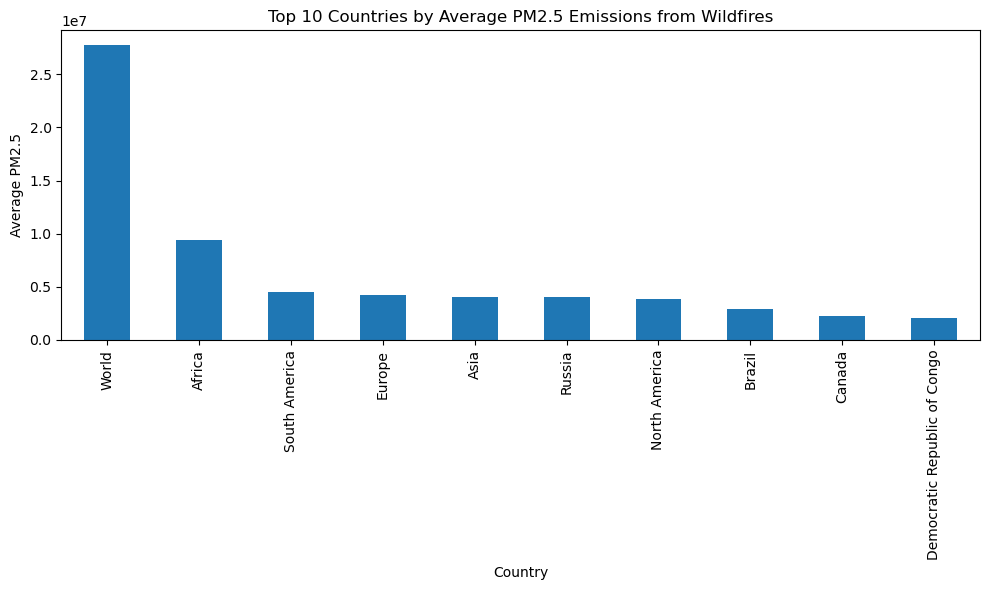

In [12]:
top10 = avg_pm25.head(10)

plt.figure(figsize=(10,6))
top10.plot(kind='bar')
plt.title('Top 10 Countries by Average PM2.5 Emissions from Wildfires')
plt.xlabel('Country')
plt.ylabel('Average PM2.5')
plt.tight_layout()
plt.show()


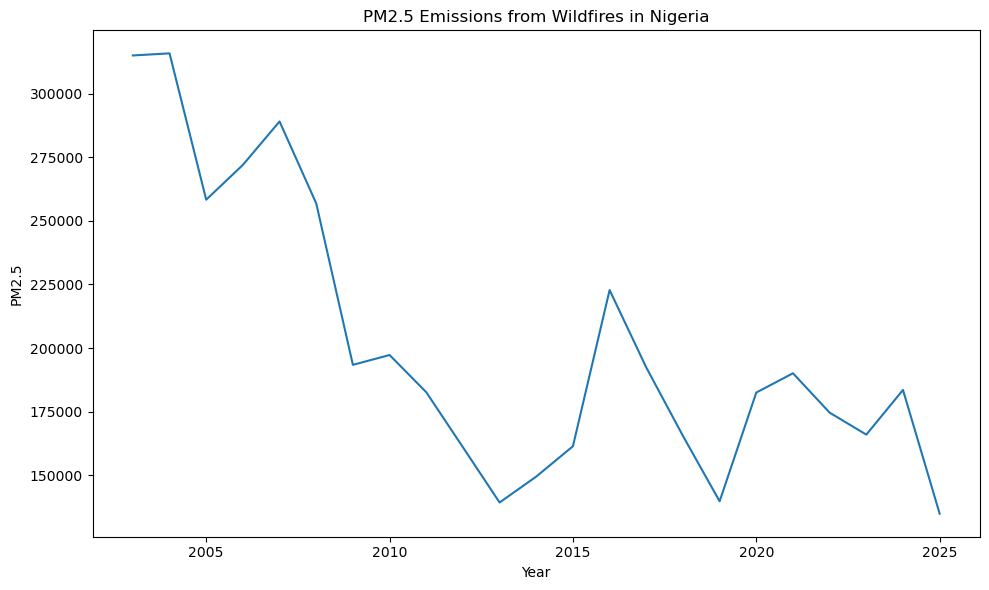

In [13]:
nigeria = df[df['country'] == 'Nigeria']

plt.figure(figsize=(10,6))
plt.plot(nigeria['year'], nigeria['pm25'])
plt.title('PM2.5 Emissions from Wildfires in Nigeria')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()


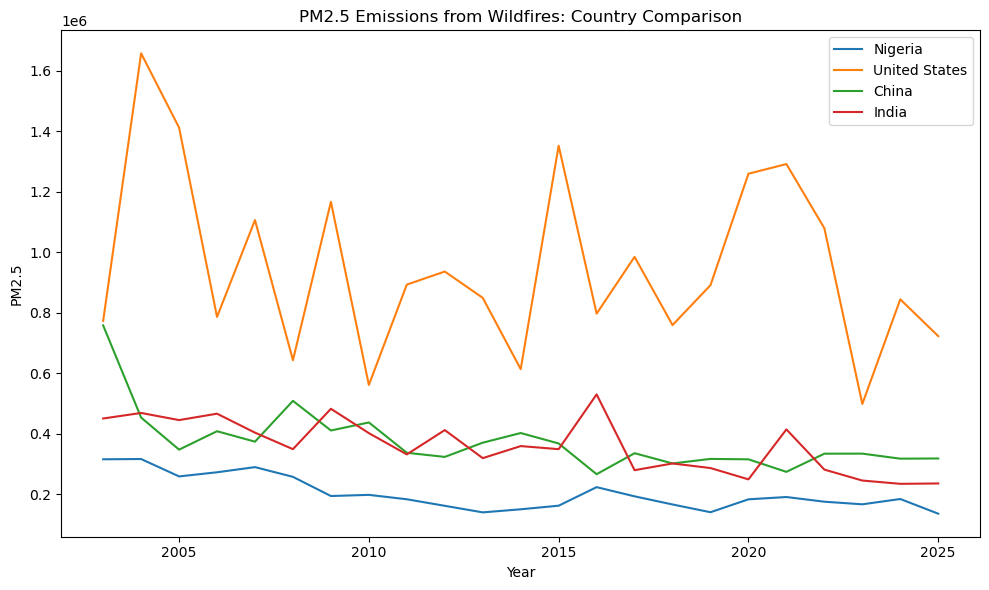

In [14]:
countries = ['Nigeria', 'United States', 'China', 'India']

plt.figure(figsize=(10,6))

for c in countries:
    subset = df[df['country'] == c]
    plt.plot(subset['year'], subset['pm25'], label=c)

plt.legend()
plt.title('PM2.5 Emissions from Wildfires: Country Comparison')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()


In [22]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

with PdfPages("pm25_analysis_report.pdf") as pdf:
    
    # Cover page with main title
    plt.figure(figsize=(11,8.5))  # Landscape A4-like size
    plt.text(0.5, 0.5, 
             "ANALYSIS OF EMISSION WILDFIRES\nJANUARY 2003 - NOVEMBER 2025\nBY ENOCH IMOKE", 
             fontsize=24, fontweight='bold', ha='center', va='center')
    plt.axis('off')  # Hide axes
    pdf.savefig()
    plt.close()

    # Chart 1: Top 10 Countries
    plt.figure(figsize=(10,6))
    top10.plot(kind='bar')
    plt.title('Top 10 Countries by Average PM2.5 Emissions')
    plt.xlabel('Country')
    plt.ylabel('Average PM2.5')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Chart 2: Nigeria Trend
    plt.figure(figsize=(10,6))
    plt.plot(nigeria['year'], nigeria['pm25'])
    plt.title('PM2.5 Emissions in Nigeria')
    plt.xlabel('Year')
    plt.ylabel('PM2.5')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Chart 3: Country Comparison
    plt.figure(figsize=(10,6))
    for c in countries:
        subset = df[df['country'] == c]
        plt.plot(subset['year'], subset['pm25'], label=c)

    plt.legend()
    plt.title('Country Comparison of PM2.5 Emissions')
    plt.xlabel('Year')
    plt.ylabel('PM2.5')
    plt.tight_layout()
    pdf.savefig()
    plt.close()
